In [1]:
%matplotlib inline

In [104]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.matplotlib import rasterplot

from nengolib import DoubleExp

tau = 0.0
tau_readout = 0.001

with nengo.Network() as model:
    stim = nengo.Node(output=lambda t: np.sin(10*2*np.pi*t))
    lif = nengo.Ensemble(100, 1, neuron_type=nengo.LIF())
    alif = nengo.Ensemble(100, 1, neuron_type=nengo.AdaptiveLIF(tau_n=.01, inc_n=.05))
    
    nengo.Connection(stim, lif, synapse=tau)
    nengo.Connection(stim, alif, synapse=tau)
    
    p_stim = nengo.Probe(stim, synapse=DoubleExp(tau, tau_readout))
    p_lif = nengo.Probe(lif, synapse=tau_readout)
    #p_alif = nengo.Probe(alif, synapse=tau_readout)  # <-- seems broken for certain AdaptiveLIF parameters
    p_a = nengo.Probe(alif.neurons, 'spikes', synapse=tau_readout)
    
with nengo.Simulator(model) as sim:
    sim.run(.5)

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


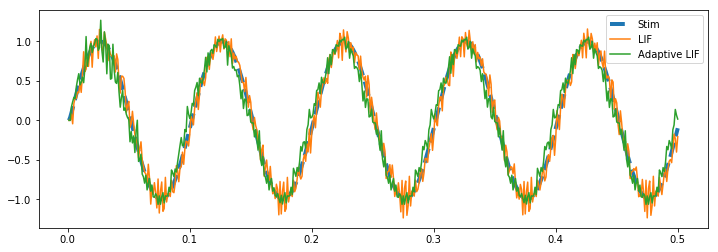

In [105]:
d, _ = nengo.solvers.LstsqL2(reg=.1)(sim.data[p_a], sim.data[p_stim])

plt.figure(figsize=(12, 4))
plt.plot(sim.trange(), sim.data[p_stim], label="Stim", linestyle='--', lw=4)
plt.plot(sim.trange(), sim.data[p_lif], label="LIF")
#plt.plot(sim.trange(), sim.data[p_alif], label="Adaptive LIF")
plt.plot(sim.trange(), sim.data[p_a].dot(d), label="Adaptive LIF")
plt.legend()
plt.show()